In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tcr
from matplotlib.ticker import FormatStrFormatter
import seaborn as sns

#make matplotlib plots included inline
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#set a default seaborn style
sns.set_style('whitegrid')

import os
from dotenv import load_dotenv
from sqlalchemy import create_engine

In [14]:
# Load the .env file from project directory
load_dotenv(dotenv_path = "/home/amybirdee/hobby_projects/.env")

True

In [15]:
# Fetch environment variables
DB_HOST = os.getenv("DB_HOST")
DB_PORT = os.getenv("DB_PORT")
DB_NAME = os.getenv("DB_NAME")
DB_USER = os.getenv("DB_USER")
DB_PASSWORD = os.getenv("DB_PASSWORD")

In [16]:
# Build connection URL
db_url = (
    f"postgresql+psycopg2://{DB_USER}:{DB_PASSWORD}"
    f"@{DB_HOST}:{DB_PORT}/{DB_NAME}"
)

engine = create_engine(db_url)

# Load Data

In [17]:
#load data
clean_topics = pd.read_sql('SELECT * FROM bumble_review_topics_clean', engine)

clean_topics.sample(10)

,topic,content,top_words,clean_topic_name
10792,5,Crashes constantly,"offline, open, update, connection, network, ke...",App loading/glitches
4600,13,"Hey, I want to end my subscription. How do I d...","cancel, subscription, delete, cancel subscript...",Unsubscribe/cancellation issues
13502,17,Very bad.blocked for no reasones,"blocked, 18, banned, reason, blocked reason, g...",Account blocked
27161,1,Great,"great great, great, nice, awesome, cool, nice ...",Great app
24559,14,I think men should be able to write more. It's...,"women, message, girls, make, ladies, woman, li...",Make the first move
2390,3,I cannot login the app,"facebook, log, upload, photo, sign, login, let...",Verification/sign-in issues
24103,24,Didn't like the way this app was structured ve...,"gun, guns, photos, pictures, banning, post, fi...",Profile moderation
8153,41,Do not join this app it is racist towards blac...,"white, ethnicity, black, race, diversity, colo...",Ethnicity filter
18288,33,keyboards is glitchy,"slow, glitchy, glitches, buggy, bugs, slow slo...",App loading/glitches
19388,1,good job,"great great, great, nice, awesome, cool, nice ...",Great app


In [18]:
#check info
clean_topics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29125 entries, 0 to 29124
Data columns (total 4 columns):
topic               29125 non-null int64
content             29125 non-null object
top_words           29125 non-null object
clean_topic_name    29125 non-null object
dtypes: int64(1), object(3)
memory usage: 910.2+ KB


# Functions

In [19]:
#define function to set figure size
def figure_size (width, height):
    plt.rcParams['figure.figsize'] = (width, height)

In [34]:
#define function for bar chart

def bar_chart(i, x, y, formatter, lim, labels, rotation, xlabel, ylabel, title):
    ax = plt.subplot(i)
    
    #plot bars
    plt.bar(x, y, color = '#FFCB37')
   
    #change y axis format
    ax.yaxis.set_major_formatter(formatter)
    ax.set_ylim(lim)
    
    #add labels to bars
    bars = plt.bar(x, y, color = '#FFCB37')
    
    for bar in bars:
        yval = bar.get_height()
        
        #the '{:,}' command adds a thousand separator to the labels
        ax.annotate('{:,}'.format(yval),
        xy = (bar.get_x() + bar.get_width() / 2, yval),
                    
        #shows label position on x and y axis
        xytext = (0, 3), 
        textcoords = 'offset points', ha = 'center', va = 'bottom', fontsize = 14)
    
    ax.set_xticks(x)
    ax.set_xticklabels(labels, rotation = rotation, fontsize = 14)
    ax.yaxis.set_tick_params(labelsize = 14)
    ax.set_xlabel(xlabel, fontsize = 14)
    ax.set_ylabel(ylabel, fontsize = 14)
    ax.set_title(title, fontsize = 14)

# Analysis

In [21]:
#group by topic and review count
num_reviews = clean_topics.groupby('clean_topic_name').agg({'content': 'count'}).rename_axis('Topic')\
.rename(columns = {'content': 'Num Reviews'}).sort_values(by = 'Num Reviews', ascending = False).reset_index()

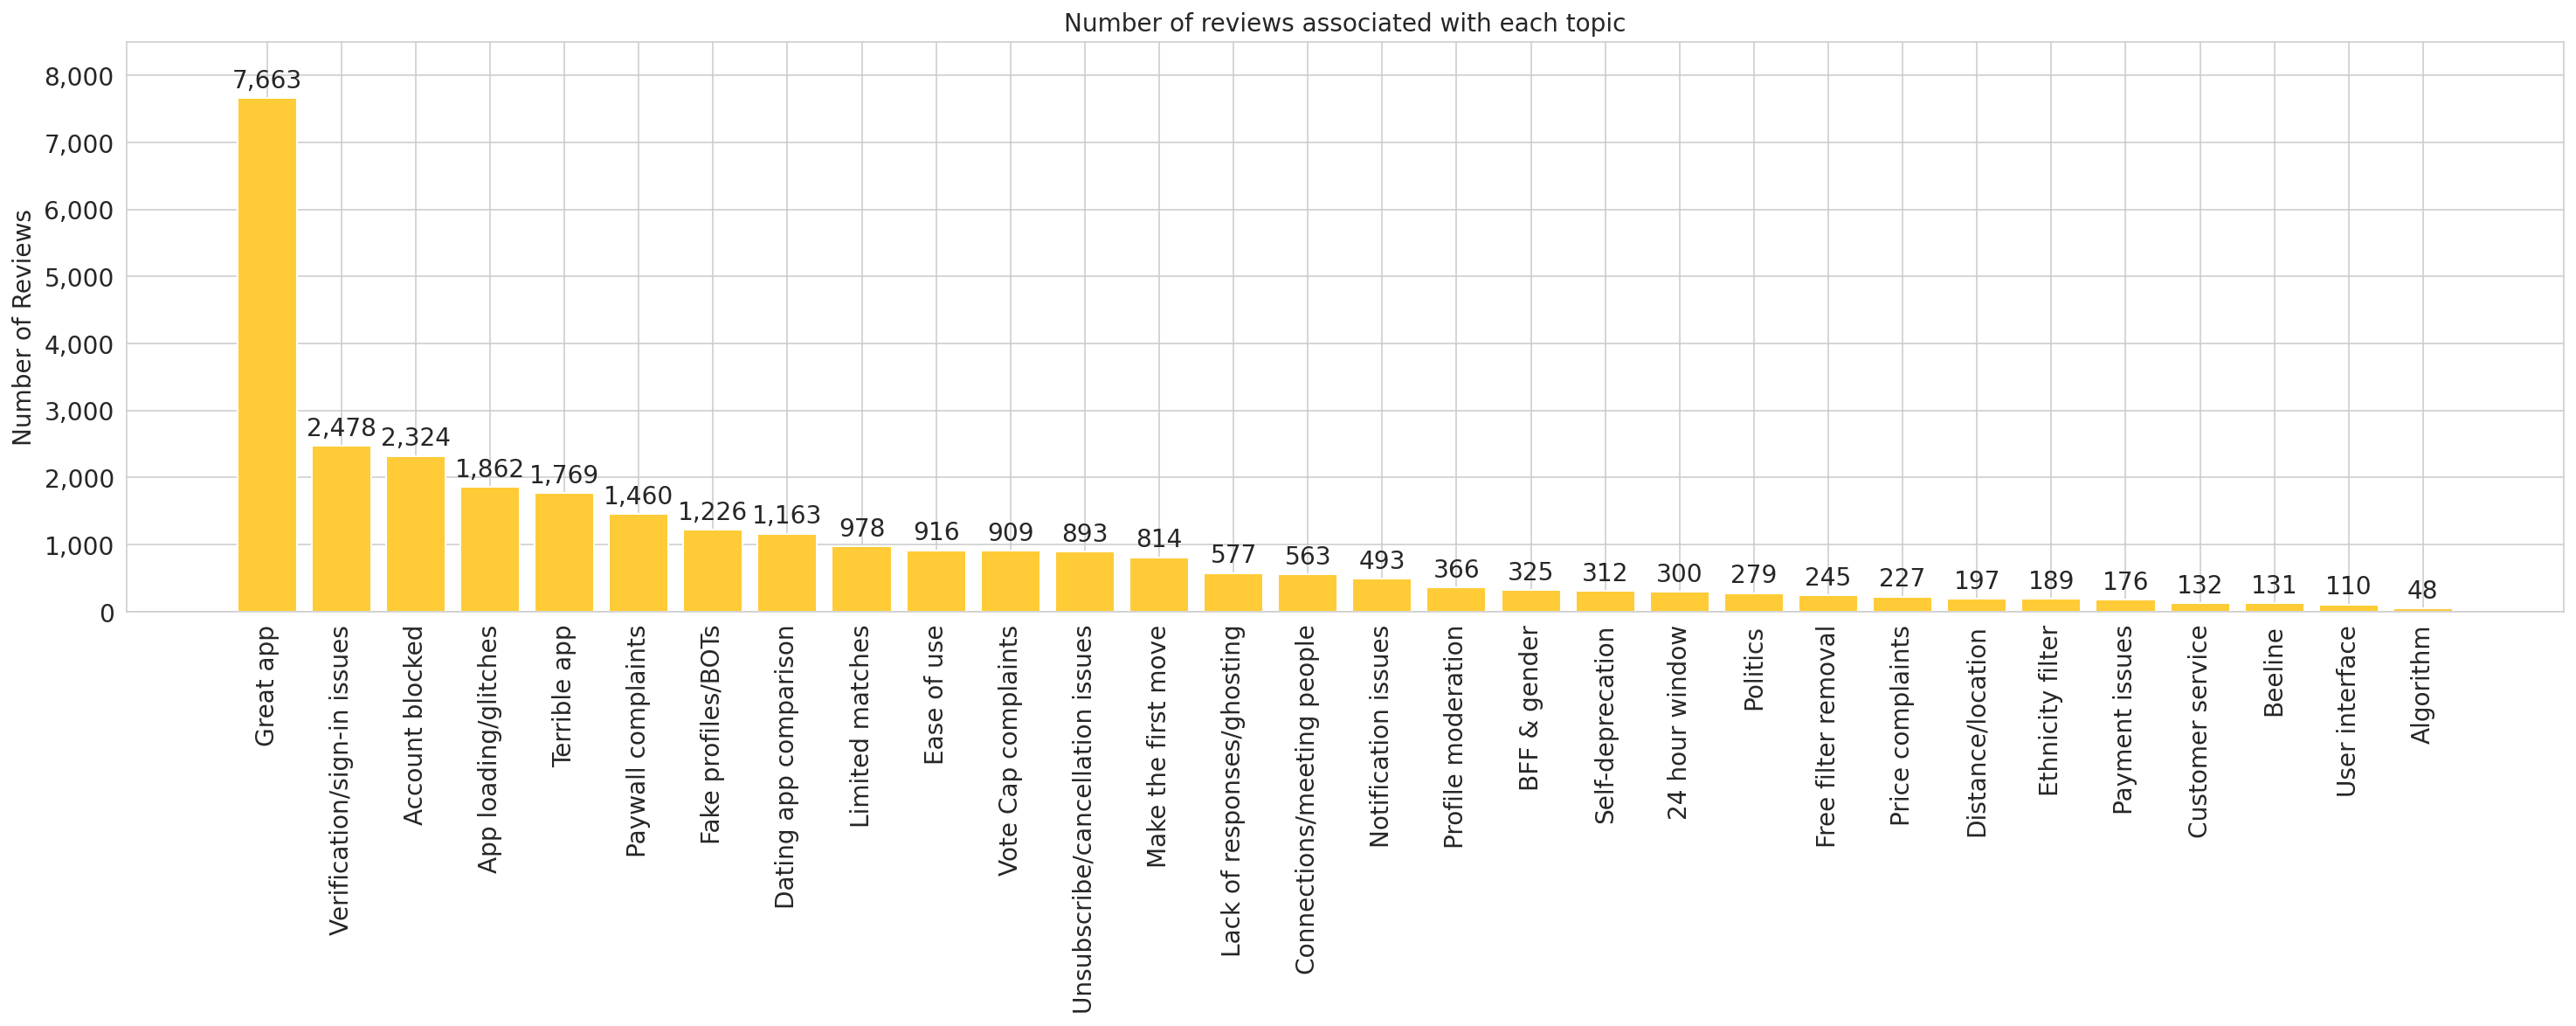

In [35]:
#apply function for chart
figure_size(25, 6)

bar_chart((111), num_reviews['Topic'], num_reviews['Num Reviews'], 
          tcr.StrMethodFormatter('{x:,.0f}'), (0, 8500), num_reviews['Topic'],
          90, None, 'Number of Reviews', 
          'Number of reviews associated with each topic')